Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline 
sns.set(style="ticks")

Загрузка датасета

In [2]:
data = pd.read_csv("winequalityN.csv")
data

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
Typelist = data['type'].unique().tolist()
for i in data['type']:
    for j in Typelist:
        if i == j:
            k = data[data['type']==i].index[0]
            data['type'][k] = Typelist.index(j)
data

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       0            7.0             0.270         0.36            20.7   
1       0            6.3             0.300         0.34             1.6   
2       0            8.1             0.280         0.40             6.9   
3       0            7.2             0.230         0.32             8.5   
4       0            7.2             0.230         0.32             8.5   
...   ...            ...               ...          ...             ...   
6492    1            6.2             0.600         0.08             2.0   
6493    1            5.9             0.550         0.10             2.2   
6494    1            6.3             0.510         0.13             2.3   
6495    1            5.9             0.645         0.12             2.0   
6496    1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [4]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('fixed acidity', 10),
 ('volatile acidity', 8),
 ('citric acid', 3),
 ('residual sugar', 2),
 ('chlorides', 2),
 ('pH', 9),
 ('sulphates', 4)]

In [5]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('fixed acidity', 0.0015391719255040787),
 ('volatile acidity', 0.001231337540403263),
 ('citric acid', 0.00046175157765122367),
 ('residual sugar', 0.00030783438510081576),
 ('chlorides', 0.00030783438510081576),
 ('pH', 0.0013852547329536709),
 ('sulphates', 0.0006156687702016315)]

In [6]:
data = data.dropna(axis=0, how='any')
data

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       0            7.0             0.270         0.36            20.7   
1       0            6.3             0.300         0.34             1.6   
2       0            8.1             0.280         0.40             6.9   
3       0            7.2             0.230         0.32             8.5   
4       0            7.2             0.230         0.32             8.5   
...   ...            ...               ...          ...             ...   
6491    1            6.8             0.620         0.08             1.9   
6492    1            6.2             0.600         0.08             2.0   
6494    1            6.3             0.510         0.13             2.3   
6495    1            5.9             0.645         0.12             2.0   
6496    1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

In [7]:
data.reset_index(inplace=True)
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[]

In [8]:
data

index type  fixed acidity  volatile acidity  citric acid  \
0         0    0            7.0             0.270         0.36   
1         1    0            6.3             0.300         0.34   
2         2    0            8.1             0.280         0.40   
3         3    0            7.2             0.230         0.32   
4         4    0            7.2             0.230         0.32   
...     ...  ...            ...               ...          ...   
6458   6491    1            6.8             0.620         0.08   
6459   6492    1            6.2             0.600         0.08   
6460   6494    1            6.3             0.510         0.13   
6461   6495    1            5.9             0.645         0.12   
6462   6496    1            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.0                 132.0   
2                6.9      0.050                 30.0                  97.0   
3                8.5      0.058                 47.0                 186.0   
4                8.5      0.058                 47.0                 186.0   
...              ...        ...                  ...                   ...   
6458             1.9      0.068                 28.0                  38.0   
6459             2.0      0.090                 32.0                  44.0   
6460             2.3      0.076                 29.0                  40.0   
6461             2.0      0.075                 32.0                  44.0   
6462             3.6      0.067                 18.0                  42.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99560  3.19       0.40      9.9        6  
...       ...   ...        ...      ...      ...  
6458  0.99651  3.42       0.82      9.5        6  
6459  0.99490  3.45       0.58     10.5        5  
6460  0.99574  3.42       0.75     11.0        6  
6461  0.99547  3.57       0.71     10.2        5  
6462  0.99549  3.39       0.66     11.0        6  

[6463 rows x 14 columns]

Масштабирование признаков

In [9]:
# Нужно ли масштабирование
data.describe()

index  fixed acidity  volatile acidity  citric acid  \
count  6463.000000    6463.000000       6463.000000  6463.000000   
mean   3255.125793       7.217755          0.339589     0.318758   
std    1869.906597       1.297913          0.164639     0.145252   
min       0.000000       3.800000          0.080000     0.000000   
25%    1639.500000       6.400000          0.230000     0.250000   
50%    3257.000000       7.000000          0.290000     0.310000   
75%    4872.500000       7.700000          0.400000     0.390000   
max    6496.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6463.000000  6463.000000          6463.000000           6463.000000   
mean         5.443958     0.056056            30.516865            115.694492   
std          4.756852     0.035076            17.758815             56.526736   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  6463.000000  6463.000000  
mean      0.994698     3.218332     0.531150    10.492825     5.818505  
std       0.003001     0.160650     0.148913     1.193128     0.873286  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992330     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.997000     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [10]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('quality', axis=1)

In [11]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [12]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['quality'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((5170, 13), (1293, 13))

Масштабирование данных на основе Z-оценки

In [13]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

index      type  fixed acidity  volatile acidity  citric acid  \
0    -1.740931 -0.571931      -0.167786         -0.422710     0.283959   
1    -1.740396 -0.571931      -0.707155         -0.240479     0.146257   
2    -1.739861 -0.571931       0.679794         -0.361966     0.559363   
3    -1.739326 -0.571931      -0.013681         -0.665684     0.008554   
4    -1.738791 -0.571931      -0.013681         -0.665684     0.008554   
...        ...       ...            ...               ...          ...   
6458  1.730634  1.748464      -0.321892          1.703315    -1.643871   
6459  1.731169  1.748464      -0.784208          1.581828    -1.643871   
6460  1.732239  1.748464      -0.707155          1.035136    -1.299616   
6461  1.732774  1.748464      -1.015366          1.855174    -1.368467   
6462  1.733308  1.748464      -0.938313         -0.179735     1.041320   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0           3.207420  -0.315228             0.815609              0.960779   
1          -0.808151  -0.201180            -0.930138              0.288479   
2           0.306117  -0.172668            -0.029107             -0.330745   
3           0.642500   0.055427             0.928238              1.243853   
4           0.642500   0.055427             0.928238              1.243853   
...              ...        ...                  ...                   ...   
6458       -0.745079   0.340545            -0.141736             -1.374580   
6459       -0.724055   0.967807             0.083522             -1.268427   
6460       -0.660984   0.568640            -0.085421             -1.339195   
6461       -0.724055   0.540129             0.083522             -1.268427   
6462       -0.387673   0.312034            -0.704880             -1.303811   

       density        pH  sulphates   alcohol  
0     2.099926 -1.359160  -0.544987 -1.418922  
1    -0.232465  0.508399  -0.276354 -0.832184  
2     0.134053  0.259391  -0.612146 -0.329265  
3     0.300653 -0.176373  -0.880779 -0.496905  
4     0.300653 -0.176373  -0.880779 -0.496905  
...        ...       ...        ...       ...  
6458  0.603864  1.255423   1.939871 -0.832184  
6459  0.067414  1.442179   0.328071  0.006014  
6460  0.347301  1.255423   1.469762  0.425113  
6461  0.257337  2.189203   1.201129 -0.245446  
6462  0.264001  1.068667   0.865337  0.425113  

[6463 rows x 13 columns]

In [14]:
data_cs11_scaled.describe()

index          type  fixed acidity  volatile acidity  \
count  6.463000e+03  6.463000e+03   6.463000e+03      6.463000e+03   
mean   1.407233e-16 -3.518083e-17  -1.231329e-16     -2.110850e-16   
std    1.000077e+00  1.000077e+00   1.000077e+00      1.000077e+00   
min   -1.740931e+00 -5.719307e-01  -2.633473e+00     -1.576837e+00   
25%   -8.640810e-01 -5.719307e-01  -6.301024e-01     -6.656838e-01   
50%    1.002377e-03 -5.719307e-01  -1.677861e-01     -3.012225e-01   
75%    8.650161e-01 -5.719307e-01   3.715830e-01      3.669567e-01   
max    1.733308e+00  1.748464e+00   6.689906e+00      7.534697e+00   

        citric acid  residual sugar     chlorides  free sulfur dioxide  \
count  6.463000e+03    6.463000e+03  6.463000e+03         6.463000e+03   
mean  -8.795206e-17    1.934945e-16 -7.036165e-17        -7.036165e-17   
std    1.000077e+00    1.000077e+00  1.000077e+00         1.000077e+00   
min   -2.194680e+00   -1.018391e+00 -1.341655e+00        -1.662225e+00   
25%   -4.734030e-01   -7.661033e-01 -5.148107e-01        -7.611944e-01   
50%   -6.029661e-02   -5.138161e-01 -2.582038e-01        -8.542138e-02   
75%    4.905119e-01    5.584045e-01  2.550099e-01         5.903516e-01   
max    9.234597e+00    1.268921e+01  1.582249e+01         1.455633e+01   

       total sulfur dioxide       density            pH     sulphates  \
count          6.463000e+03  6.463000e+03  6.463000e+03  6.463000e+03   
mean           1.055425e-16  5.219955e-14  9.850631e-16  1.407233e-16   
std            1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00   
min           -1.940727e+00 -2.528205e+00 -3.102215e+00 -2.089628e+00   
25%           -6.845873e-01 -7.889073e-01 -6.743884e-01 -6.793038e-01   
50%            4.078931e-02  6.408161e-02 -5.186862e-02 -1.420373e-01   
75%            7.130896e-01  7.671311e-01  6.329031e-01  4.623876e-01   
max            5.737650e+00  1.475482e+01  4.928289e+00  9.864552e+00   

            alcohol  
count  6.463000e+03  
mean  -5.453028e-16  
std    1.000077e+00  
min   -2.089480e+00  
25%   -8.321839e-01  
50%   -1.616257e-01  
75%    6.765720e-01  
max    3.694084e+00

In [15]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

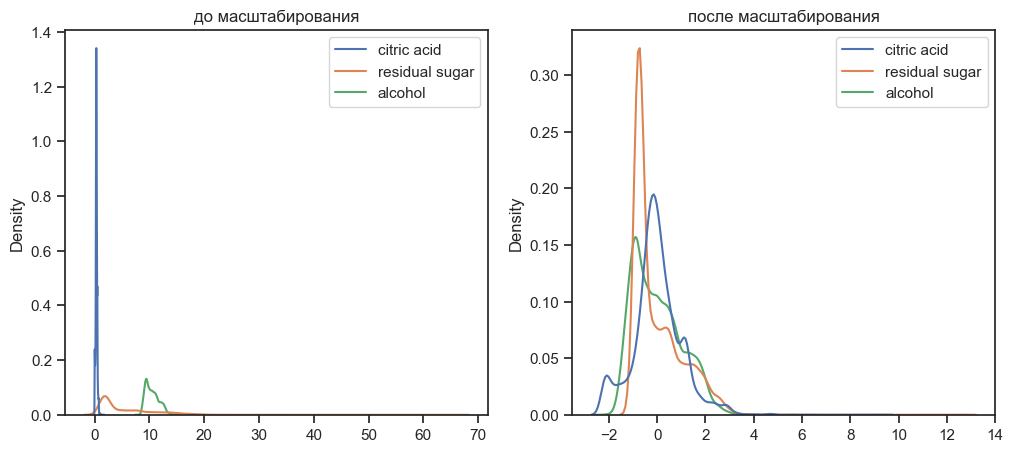

In [16]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [17]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [18]:
data_cs12_scaled_train.describe()

index          type  fixed acidity  volatile acidity  \
count  5.170000e+03  5.170000e+03   5.170000e+03      5.170000e+03   
mean  -9.757937e-17  4.260508e-17   4.641892e-16     -3.037330e-16   
std    1.000097e+00  1.000097e+00   1.000097e+00      1.000097e+00   
min   -1.729700e+00 -5.709475e-01  -2.622586e+00     -1.577543e+00   
25%   -8.711414e-01 -5.709475e-01  -6.234025e-01     -6.625140e-01   
50%    4.990670e-03 -5.709475e-01  -1.620525e-01     -2.965024e-01   
75%    8.619519e-01 -5.709475e-01   3.761891e-01      3.745188e-01   
max    1.729564e+00  1.751475e+00   6.681305e+00      7.572747e+00   

        citric acid  residual sugar     chlorides  free sulfur dioxide  \
count  5.170000e+03    5.170000e+03  5.170000e+03         5.170000e+03   
mean   4.473533e-16    9.345630e-17 -8.108708e-17         1.003281e-16   
std    1.000097e+00    1.000097e+00  1.000097e+00         1.000097e+00   
min   -2.204527e+00   -1.016795e+00 -1.322909e+00        -1.667163e+00   
25%   -4.749745e-01   -7.654524e-01 -5.060611e-01        -7.626958e-01   
50%   -5.988198e-02   -5.141098e-01 -2.525565e-01        -8.434549e-02   
75%    4.935747e-01    5.540961e-01  2.262853e-01         5.940048e-01   
max    9.279700e+00    1.263948e+01  1.563373e+01         1.461324e+01   

       total sulfur dioxide       density            pH     sulphates  \
count          5.170000e+03  5.170000e+03  5.170000e+03  5.170000e+03   
mean           3.229740e-17  9.510553e-16 -3.856447e-15  4.026867e-16   
std            1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00   
min           -1.952567e+00 -2.523179e+00 -3.099985e+00 -2.087092e+00   
25%           -6.737337e-01 -7.810652e-01 -6.762115e-01 -6.784674e-01   
50%            3.672900e-02  6.339461e-02 -5.473114e-02 -1.418485e-01   
75%            7.116686e-01  7.615700e-01  6.288973e-01  4.618478e-01   
max            5.755954e+00  1.472175e+01  4.917112e+00  9.852679e+00   

            alcohol  
count  5.170000e+03  
mean  -1.149650e-15  
std    1.000097e+00  
min   -2.089381e+00  
25%   -8.313292e-01  
50%   -1.603682e-01  
75%    6.783330e-01  
max    3.697658e+00

In [19]:
data_cs12_scaled_test.describe()

index         type  fixed acidity  volatile acidity  citric acid  \
count  1293.000000  1293.000000    1293.000000       1293.000000  1293.000000   
mean      0.018626     0.007413       0.026906          0.029997     0.003522   
std       0.978501     1.004727       0.989597          1.021126     1.024198   
min      -1.727570    -0.570947      -1.930561         -1.577543    -2.204527   
25%      -0.794591    -0.570947      -0.623402         -0.662514    -0.474975   
50%       0.004192    -0.570947      -0.162053         -0.296502    -0.059882   
75%       0.872203    -0.570947       0.376189          0.435521     0.562757   
max       1.721043     1.751475       6.373738          6.047698     4.713682   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     1293.000000  1293.000000          1293.000000           1293.000000   
mean        -0.011084     0.012624             0.007006             -0.021096   
std          0.981471     0.938309             1.019295              1.019692   
min         -1.016795    -1.182073            -1.610634             -1.952567   
25%         -0.765452    -0.506061            -0.762696             -0.709257   
50%         -0.535055    -0.252557            -0.084345              0.036729   
75%          0.554096     0.282620             0.594005              0.693907   
max          3.779659    10.310132             6.557834              4.050843   

           density           pH    sulphates      alcohol  
count  1293.000000  1293.000000  1293.000000  1293.000000  
mean     -0.002728    -0.014741     0.000088     0.006771  
std       0.989315     0.991922     0.994345     1.003369  
min      -2.420115    -2.664949    -1.684628    -1.753901  
25%      -0.810987    -0.738360    -0.678467    -0.831329  
50%       0.066719    -0.116879    -0.141849    -0.160368  
75%       0.764895     0.691045     0.461848     0.762203  
max       2.989082     4.917112     9.517292     2.984762

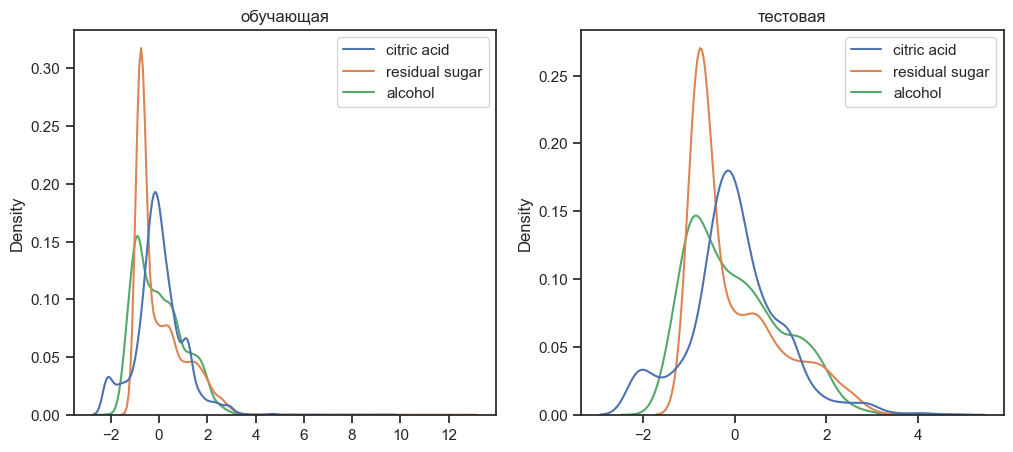

In [20]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

Масштабирование "Mean Normalisation"

In [21]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [22]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

index         type  fixed acidity  volatile acidity  citric acid  \
count   6463.00000  6463.000000    6463.000000        6463.00000  6463.000000   
unique  6463.00000     2.000000     106.000000         187.00000    89.000000   
top       -0.50002    -0.245841      -0.033947          -0.03907    -0.011238   
freq       1.00000  4870.000000     352.000000         285.00000   337.000000   

        residual sugar    chlorides  free sulfur dioxide  \
count      6463.000000  6463.000000          6463.000000   
unique      315.000000   214.000000           135.000000   
top          -0.052984    -0.019878            -0.005181   
freq        235.000000   203.000000           180.000000   

        total sulfur dioxide      density           pH    sulphates  \
count            6463.000000  6463.000000  6463.000000  6463.000000   
unique            276.000000   996.000000   108.000000   111.000000   
top                -0.011364     0.048211    -0.045586    -0.017498   
freq               71.000000    69.000000   200.000000   271.000000   

            alcohol  
count   6463.000000  
unique   111.000000  
top       -0.143654  
freq     366.000000

In [23]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [24]:
data_cs22_scaled_train.describe()

index         type  fixed acidity  volatile acidity  \
count   5170.000000  5170.000000    5170.000000       5170.000000   
unique  5170.000000     2.000000     105.000000        182.000000   
top       -0.223696    -0.245841      -0.033947         -0.065737   
freq       1.000000  3899.000000     293.000000        220.000000   

        citric acid  residual sugar    chlorides  free sulfur dioxide  \
count   5170.000000     5170.000000  5170.000000          5170.000000   
unique    87.000000      301.000000   201.000000           126.000000   
top       -0.011238       -0.052984    -0.019878            -0.005181   
freq     273.000000      190.000000   163.000000           151.000000   

        total sulfur dioxide      density          pH    sulphates  \
count            5170.000000  5170.000000  5170.00000  5170.000000   
unique            269.000000   944.000000   108.00000   108.000000   
top                -0.011364     0.055922    -0.06109    -0.017498   
freq               55.000000    60.000000   159.00000   221.000000   

            alcohol  
count   5170.000000  
unique   105.000000  
top       -0.143654  
freq     293.000000

In [25]:
data_cs22_scaled_test.describe()

index         type  fixed acidity  volatile acidity  \
count   1293.000000  1293.000000    1293.000000        1293.00000   
unique  1293.000000     2.000000      80.000000         120.00000   
top        0.076643    -0.245841      -0.050476          -0.03907   
freq       1.000000   971.000000      68.000000          69.00000   

        citric acid  residual sugar    chlorides  free sulfur dioxide  \
count    1293.00000     1293.000000  1293.000000          1293.000000   
unique     80.00000      218.000000   135.000000            95.000000   
top         0.00081       -0.059119    -0.018217             0.005236   
freq       66.00000       58.000000    45.000000            37.000000   

        total sulfur dioxide      density           pH    sulphates  \
count            1293.000000  1293.000000  1293.000000  1293.000000   
unique            240.000000   525.000000    90.000000    84.000000   
top                -0.011364     0.028932    -0.037835    -0.017498   
freq               16.000000    18.000000    50.000000    50.000000   

            alcohol  
count   1293.000000  
unique    70.000000  
top       -0.158146  
freq      77.000000

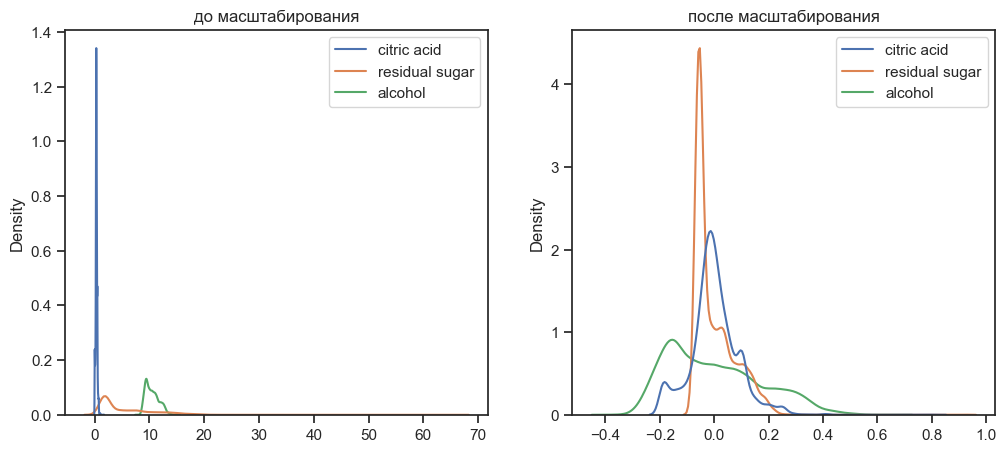

In [26]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

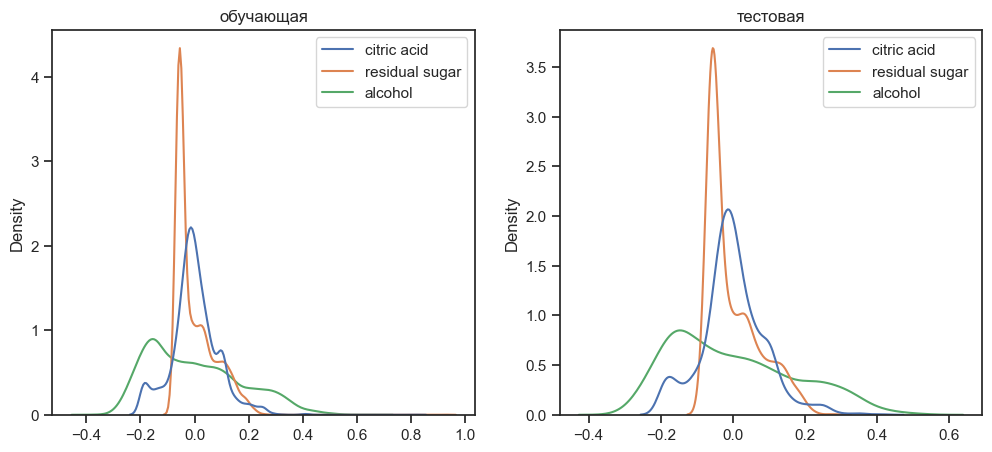

In [27]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [28]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

index         type  fixed acidity  volatile acidity  citric acid  \
count  6463.000000  6463.000000    6463.000000       6463.000000  6463.000000   
mean      0.501097     0.246480       0.282459          0.173059     0.192023   
std       0.287855     0.430995       0.107266          0.109759     0.087501   
min       0.000000     0.000000       0.000000          0.000000     0.000000   
25%       0.252386     0.000000       0.214876          0.100000     0.150602   
50%       0.501385     0.000000       0.264463          0.140000     0.186747   
75%       0.750077     0.000000       0.322314          0.213333     0.234940   
max       1.000000     1.000000       1.000000          1.000000     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6463.000000  6463.000000          6463.000000           6463.000000   
mean         0.074294     0.078166             0.102489              0.252752   
std          0.072958     0.058265             0.061663              0.130246   
min          0.000000     0.000000             0.000000              0.000000   
25%          0.018405     0.048173             0.055556              0.163594   
50%          0.036810     0.063123             0.097222              0.258065   
75%          0.115031     0.093023             0.138889              0.345622   
max          1.000000     1.000000             1.000000              1.000000   

           density           pH    sulphates      alcohol  
count  6463.000000  6463.000000  6463.000000  6463.000000  
mean      0.146283     0.386304     0.174803     0.361279  
std       0.057865     0.124535     0.083659     0.172917  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.100636     0.302326     0.117978     0.217391  
50%       0.149990     0.379845     0.162921     0.333333  
75%       0.190669     0.465116     0.213483     0.478261  
max       1.000000     1.000000     1.000000     1.000000

MinMax-масштабирование

In [29]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

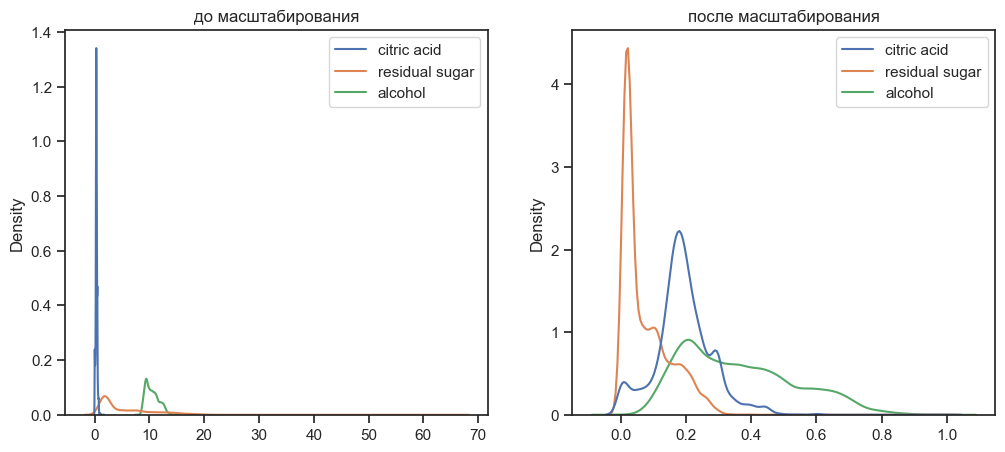

In [30]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

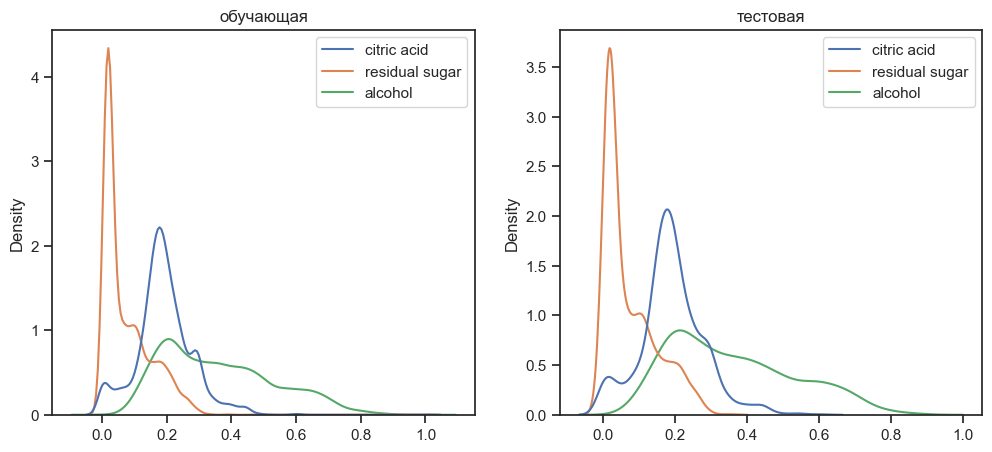

In [31]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

Обработка выбросов для числовых признаков

Масштабирование по медиане

In [32]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

index         type  fixed acidity  volatile acidity  citric acid  \
count  6463.000000  6463.000000    6463.000000       6463.000000  6463.000000   
mean     -0.000580     0.246480       0.167504          0.291701     0.062554   
std       0.578381     0.430995       0.998395          0.968466     1.037516   
min      -1.007423     0.000000      -2.461538         -1.235294    -2.214286   
25%      -0.500309     0.000000      -0.461538         -0.352941    -0.428571   
50%       0.000000     0.000000       0.000000          0.000000     0.000000   
75%       0.499691     0.000000       0.538462          0.647059     0.571429   
max       1.001856     1.000000       6.846154          7.588235     9.642857   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6463.000000  6463.000000          6463.000000           6463.000000   
mean         0.387930     0.335408             0.063203             -0.029184   
std          0.755056     1.299105             0.739951              0.715528   
min         -0.380952    -1.407407            -1.166667             -1.417722   
25%         -0.190476    -0.333333            -0.500000             -0.518987   
50%          0.000000     0.000000             0.000000              0.000000   
75%          0.809524     0.666667             0.500000              0.481013   
max          9.968254    20.888889            10.833333              4.075949   

           density           pH    sulphates      alcohol  
count  6463.000000  6463.000000  6463.000000  6463.000000  
mean     -0.041183     0.039676     0.124410     0.107125  
std       0.642707     0.765000     0.875961     0.662849  
min      -1.665953    -2.333333    -1.705882    -1.277778  
25%      -0.548180    -0.476190    -0.470588    -0.444444  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.451820     0.523810     0.529412     0.555556  
max       9.441113     3.809524     8.764706     2.555556

In [33]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

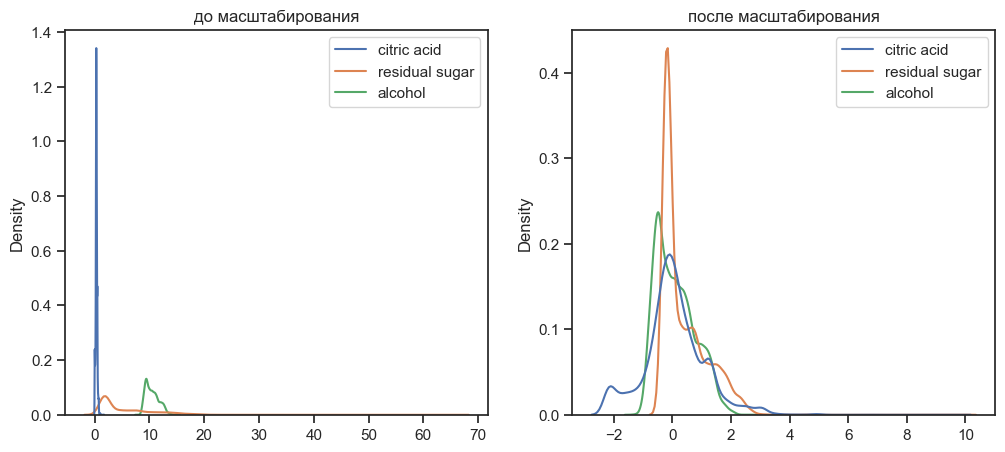

In [34]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

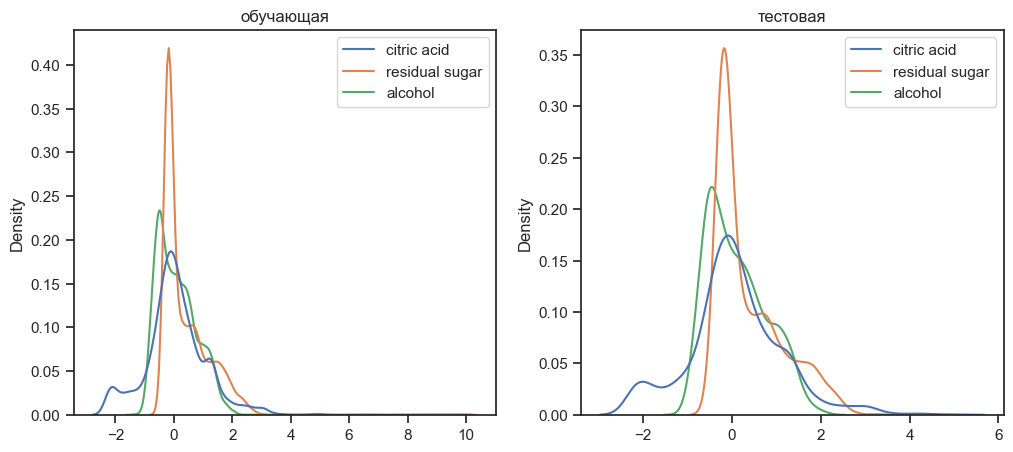

In [35]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

In [36]:
x_col_list = ['citric acid', 'residual sugar', 'alcohol', 'quality']
x_col_lost = ['type','fixed acidity','volatile acidity','chlorides','free sulfur dioxide','total sulfur dioxide','density',
              'pH','sulphates']
x_col_all = ['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
data2 = data.drop(x_col_lost, axis = 1)
data2

index  citric acid  residual sugar  alcohol  quality
0         0         0.36            20.7      8.8        6
1         1         0.34             1.6      9.5        6
2         2         0.40             6.9     10.1        6
3         3         0.32             8.5      9.9        6
4         4         0.32             8.5      9.9        6
...     ...          ...             ...      ...      ...
6458   6491         0.08             1.9      9.5        6
6459   6492         0.08             2.0     10.5        5
6460   6494         0.13             2.3     11.0        6
6461   6495         0.12             2.0     10.2        5
6462   6496         0.47             3.6     11.0        6

[6463 rows x 5 columns]

In [37]:
# Колонки с пропусками
hcols_with_na = [c for c in data2.columns if data2[c].isnull().sum() > 0]
hcols_with_na
# Количество пропусков
[(c, data2[c].isnull().sum()) for c in hcols_with_na]

[]

In [38]:
# Доля (процент) пропусков
[(c, data2[c].isnull().mean()) for c in hcols_with_na]

[]

In [39]:
data2 = data2.dropna(axis=0, how='any')
data2

index  citric acid  residual sugar  alcohol  quality
0         0         0.36            20.7      8.8        6
1         1         0.34             1.6      9.5        6
2         2         0.40             6.9     10.1        6
3         3         0.32             8.5      9.9        6
4         4         0.32             8.5      9.9        6
...     ...          ...             ...      ...      ...
6458   6491         0.08             1.9      9.5        6
6459   6492         0.08             2.0     10.5        5
6460   6494         0.13             2.3     11.0        6
6461   6495         0.12             2.0     10.2        5
6462   6496         0.47             3.6     11.0        6

[6463 rows x 5 columns]

In [40]:
data2.shape

(6463, 5)

In [41]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

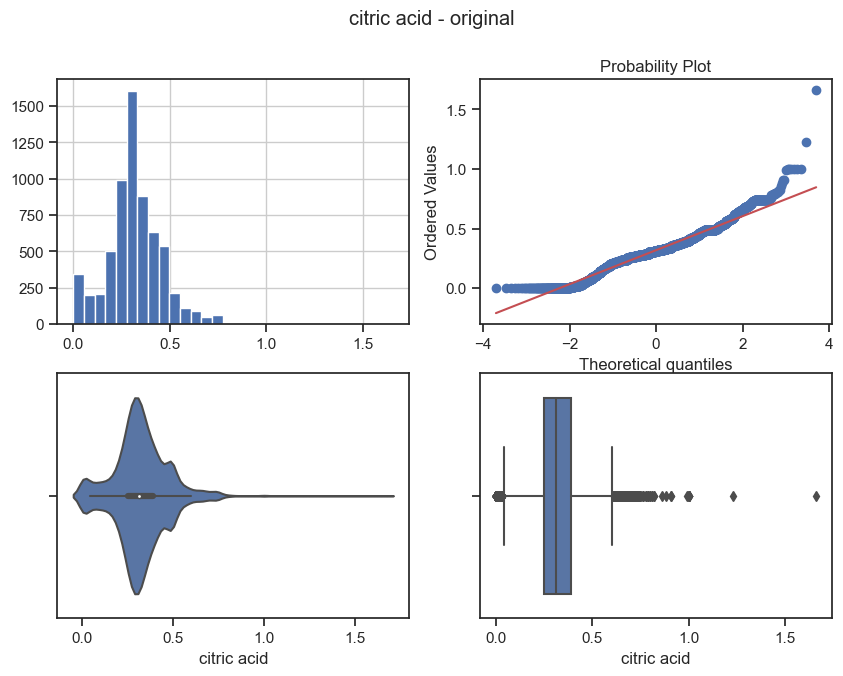

In [42]:
diagnostic_plots(data2, 'citric acid', 'citric acid - original')

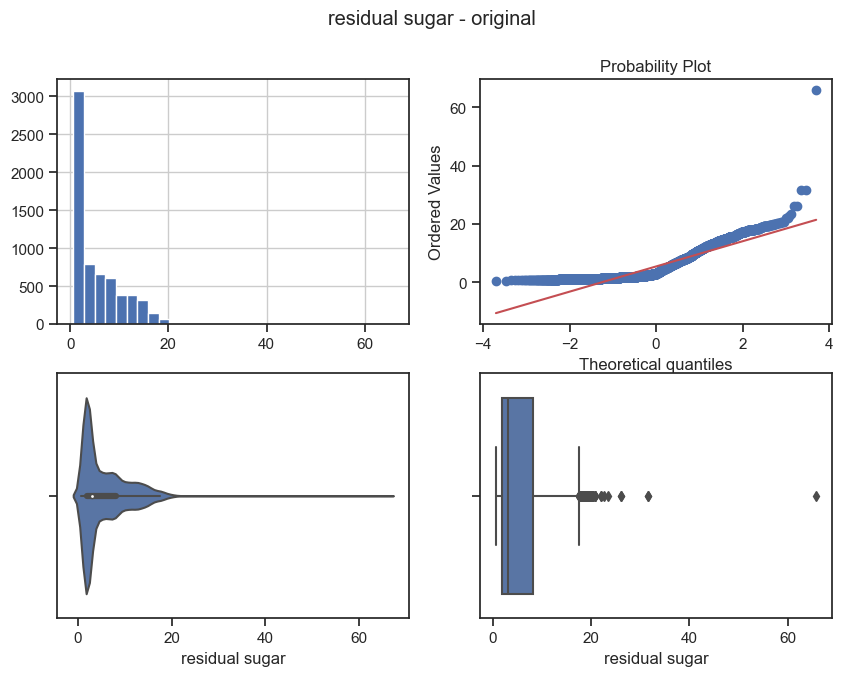

In [43]:
diagnostic_plots(data2, 'residual sugar', 'residual sugar - original')

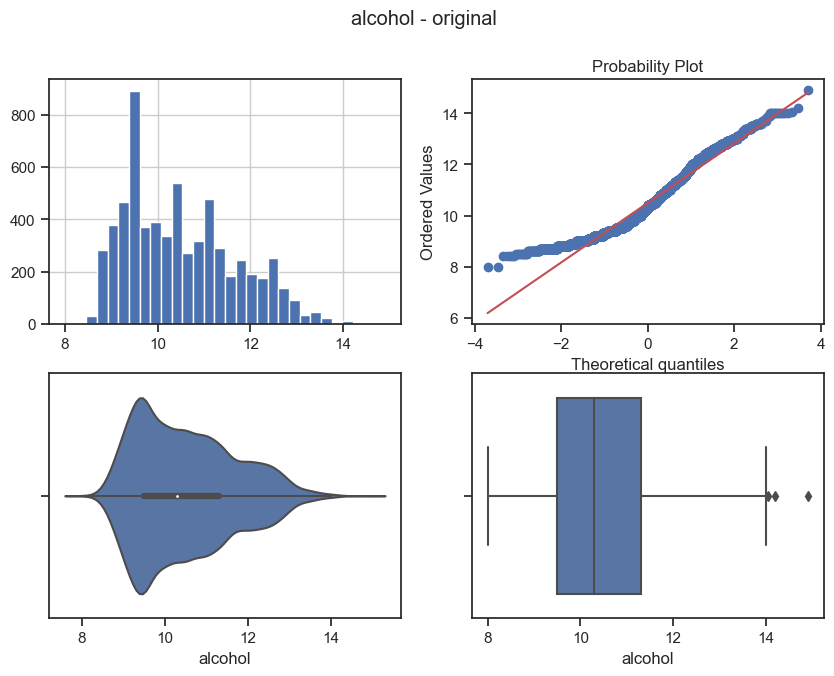

In [44]:
diagnostic_plots(data, 'alcohol', 'alcohol - original')

In [45]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [46]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary   

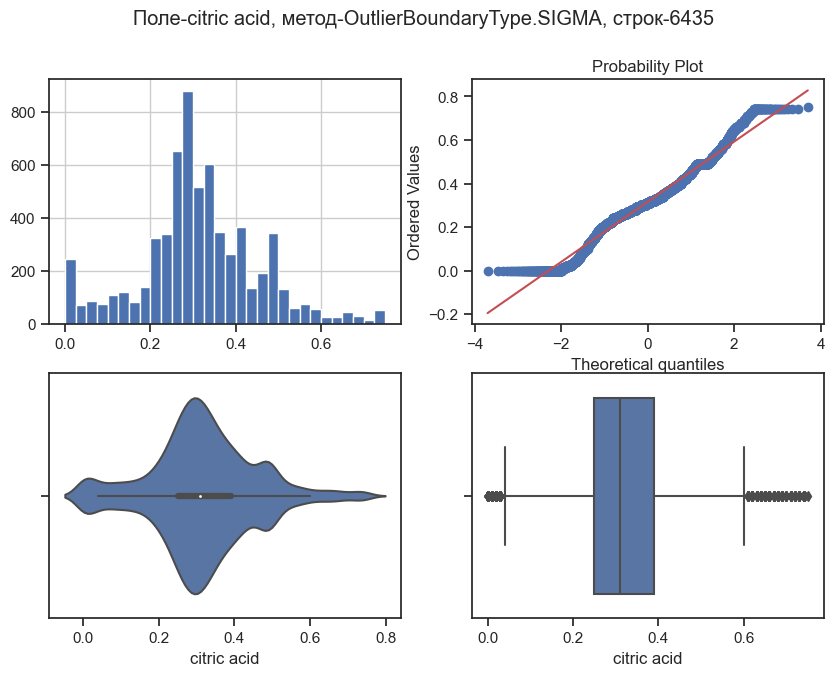

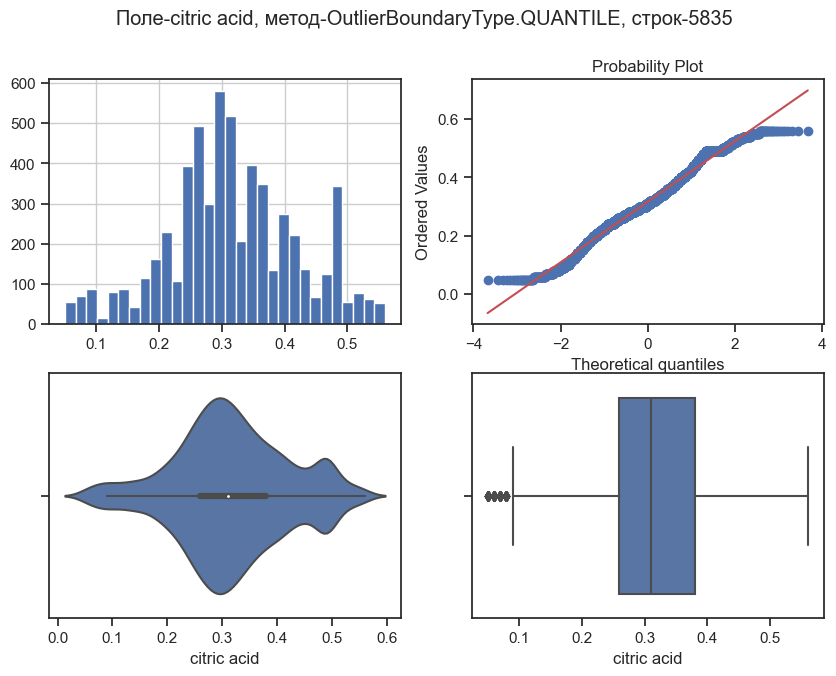

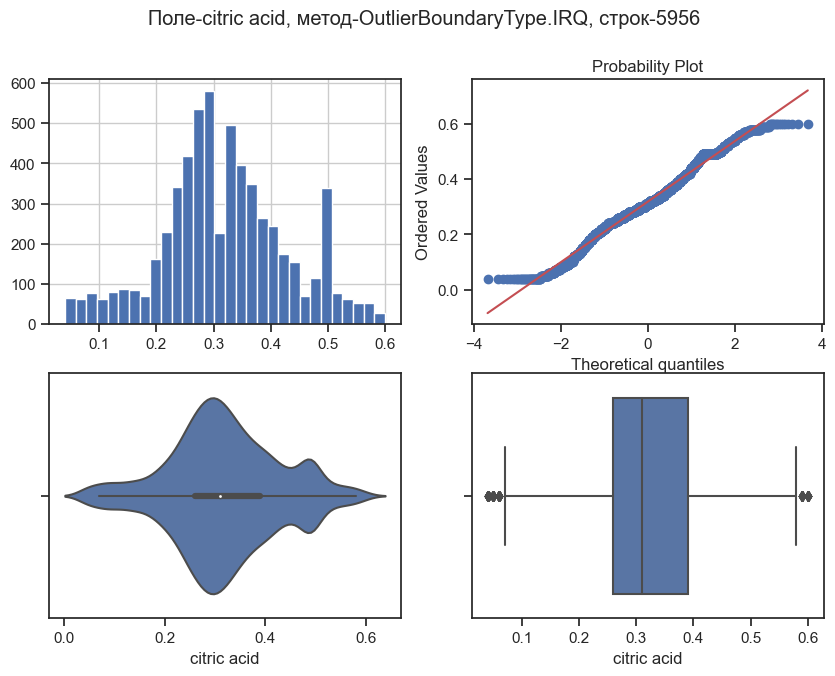

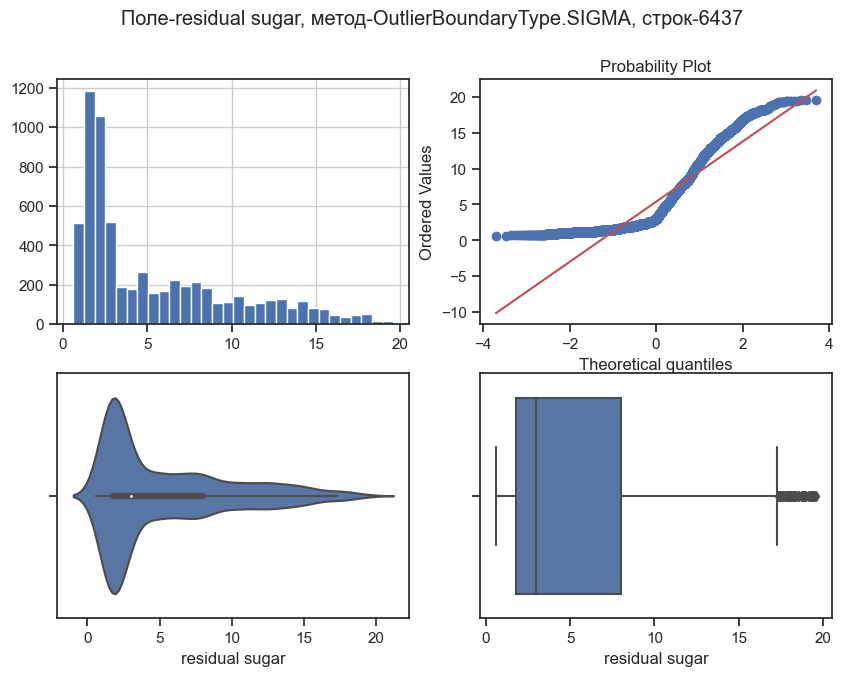

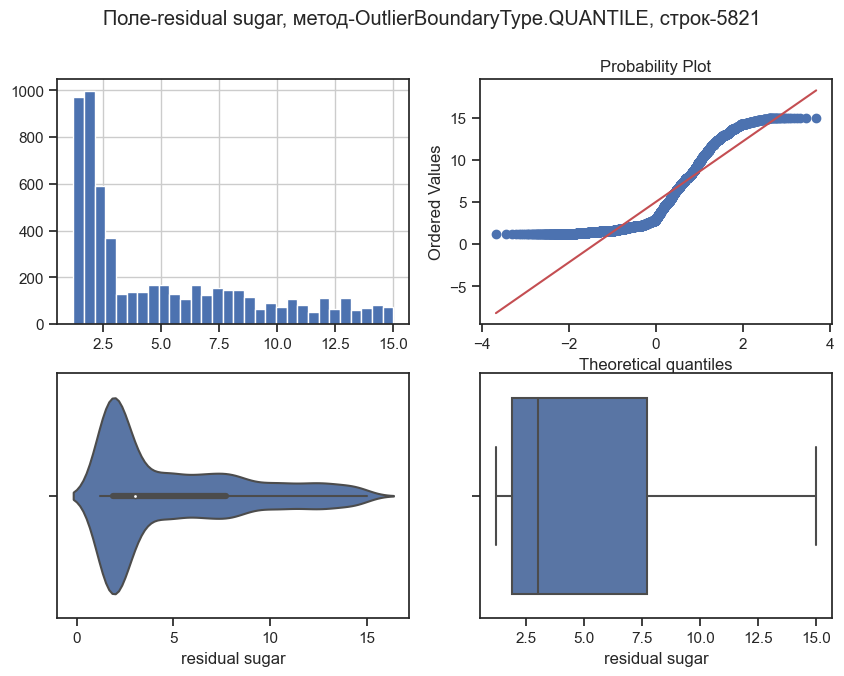

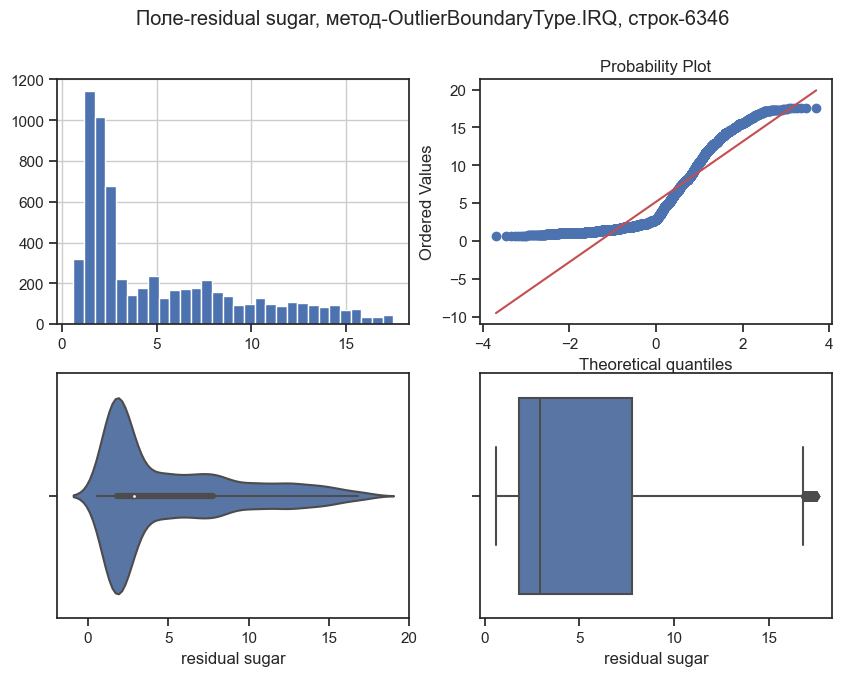

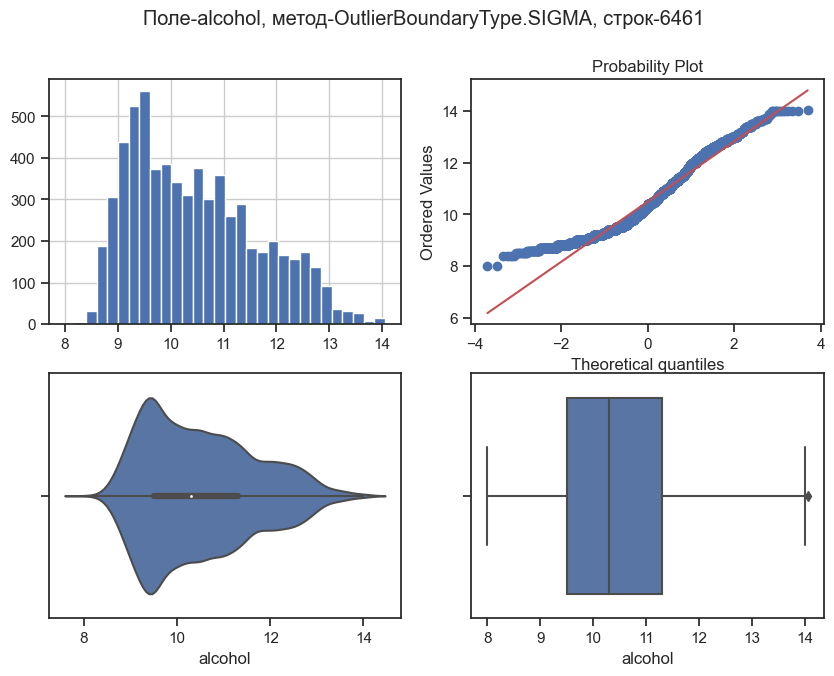

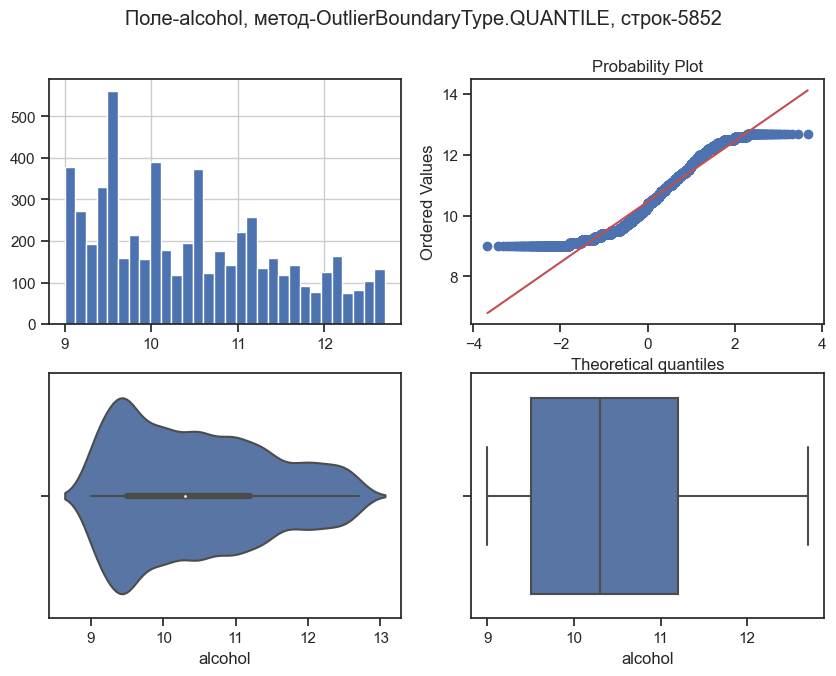

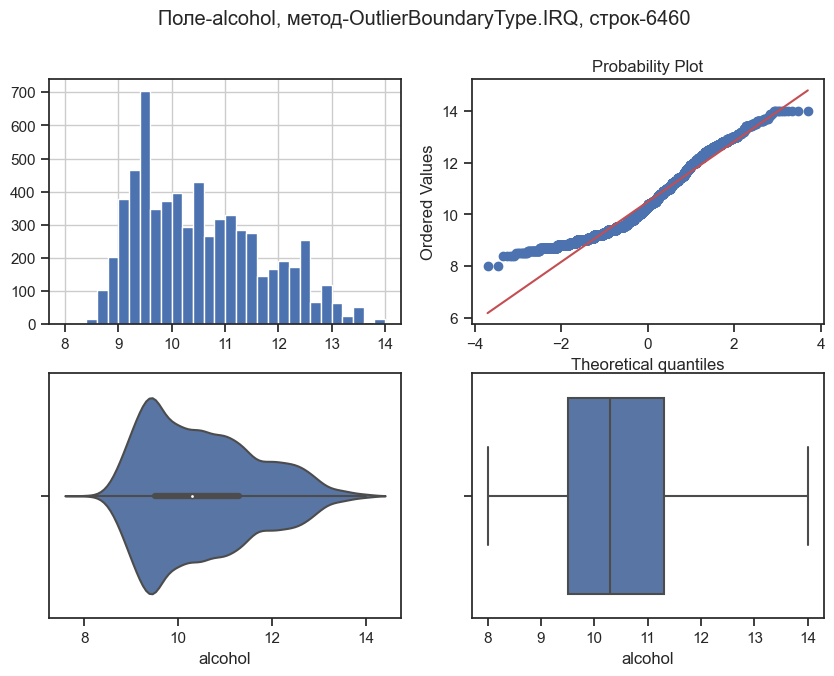

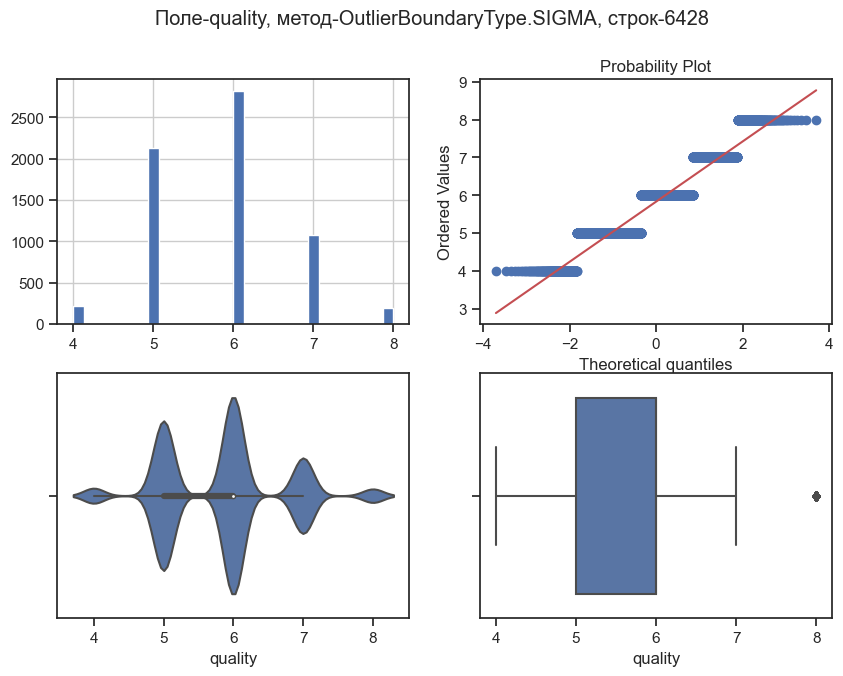

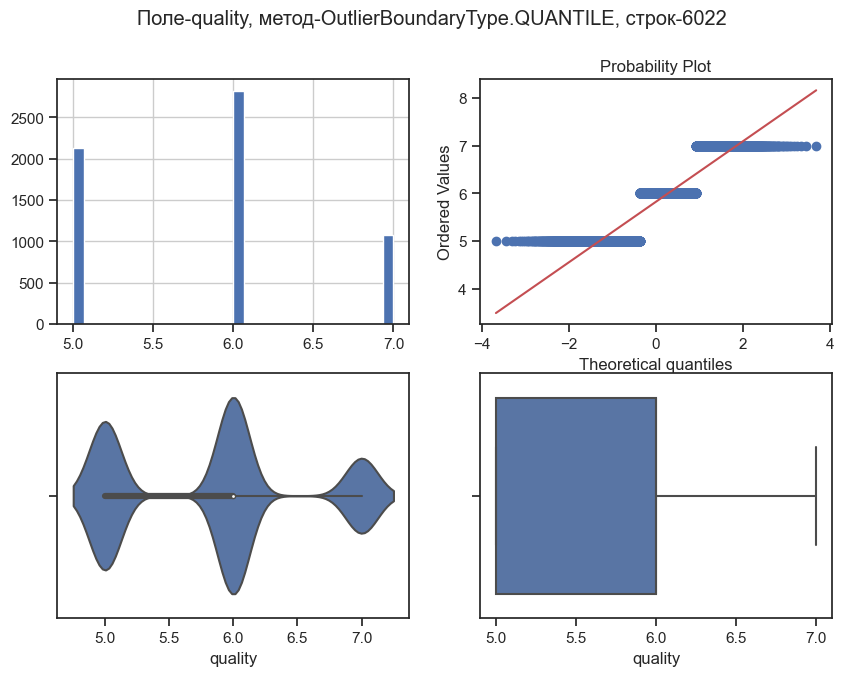

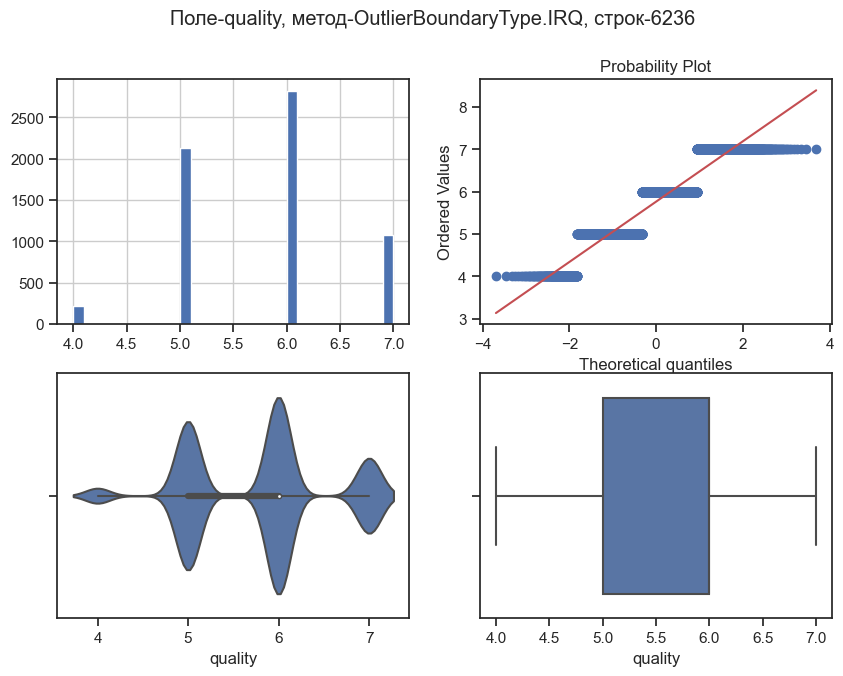

In [47]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data2, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data2[col] > upper_boundary, True, 
                                 np.where(data2[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data2.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

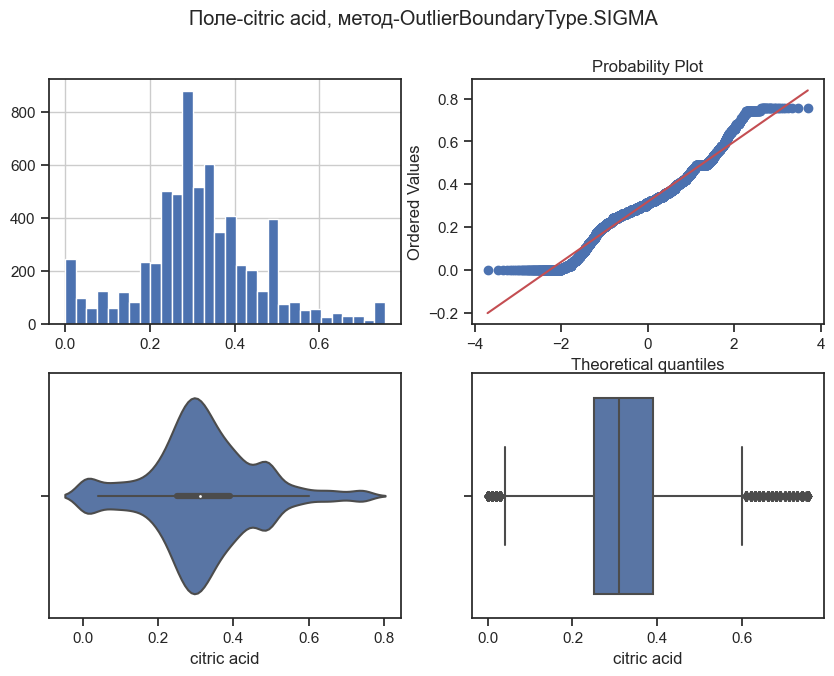

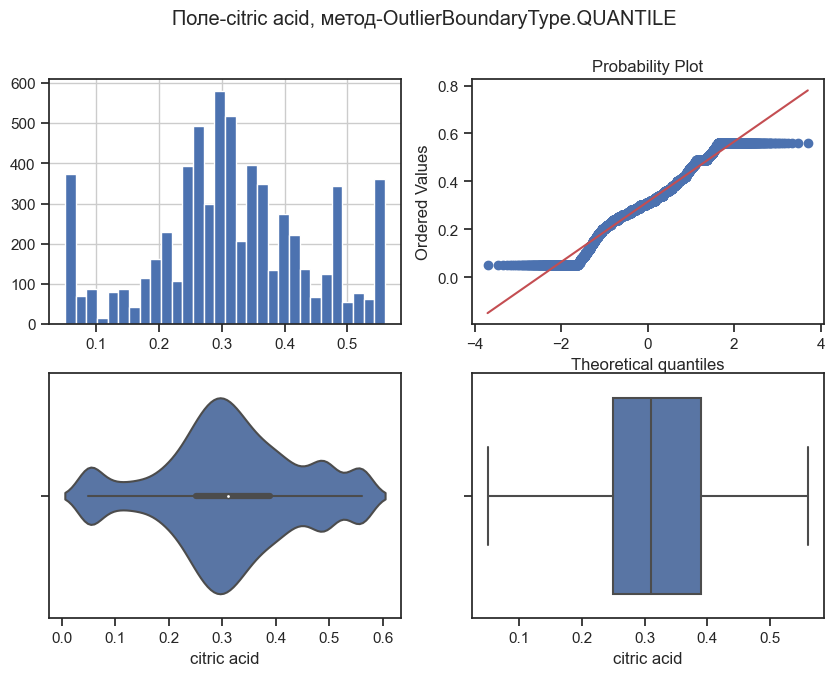

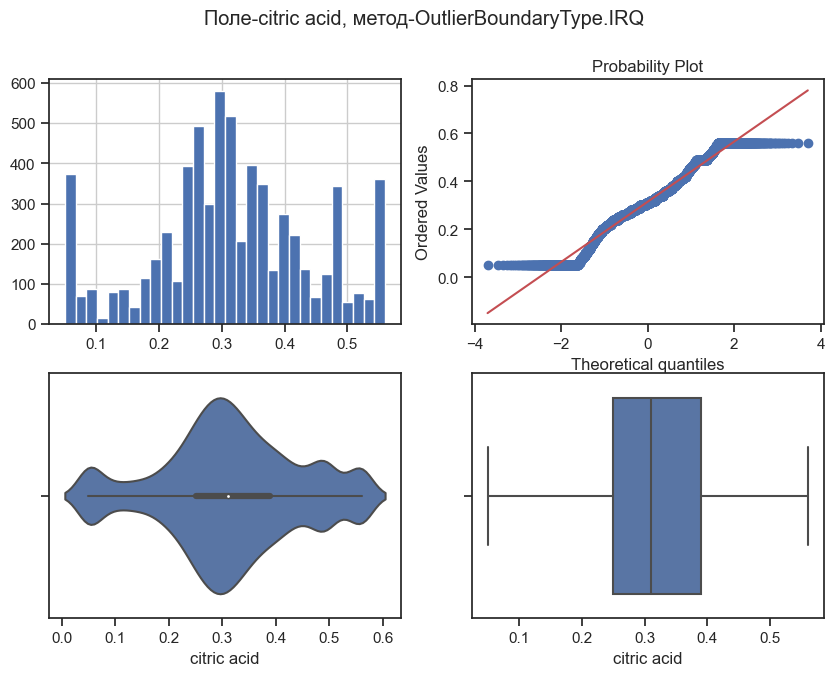

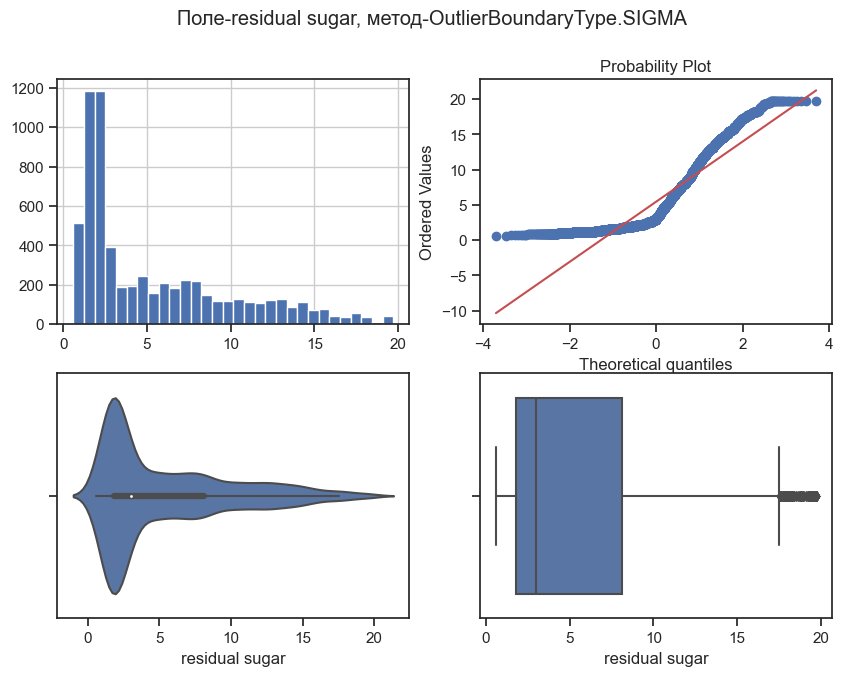

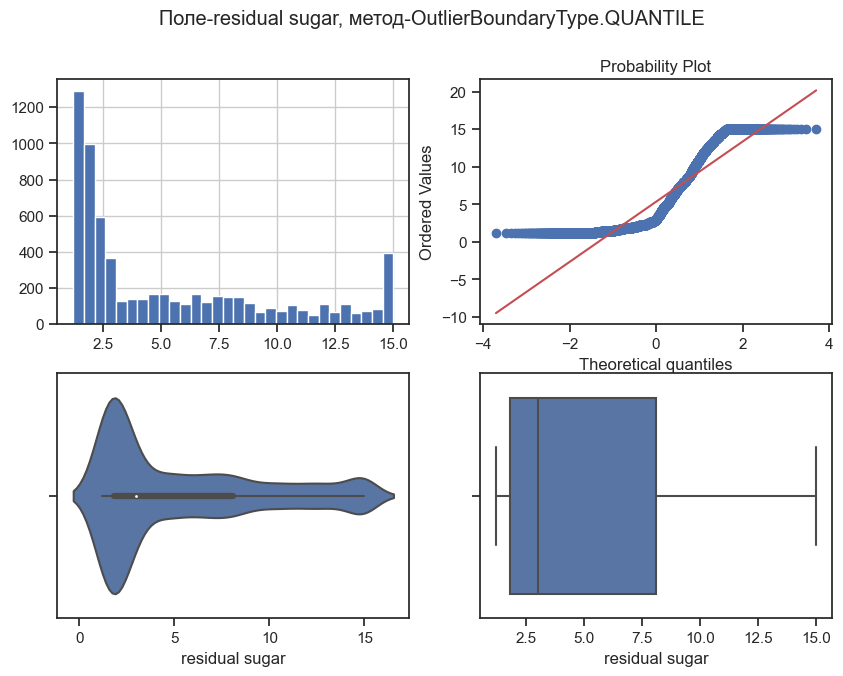

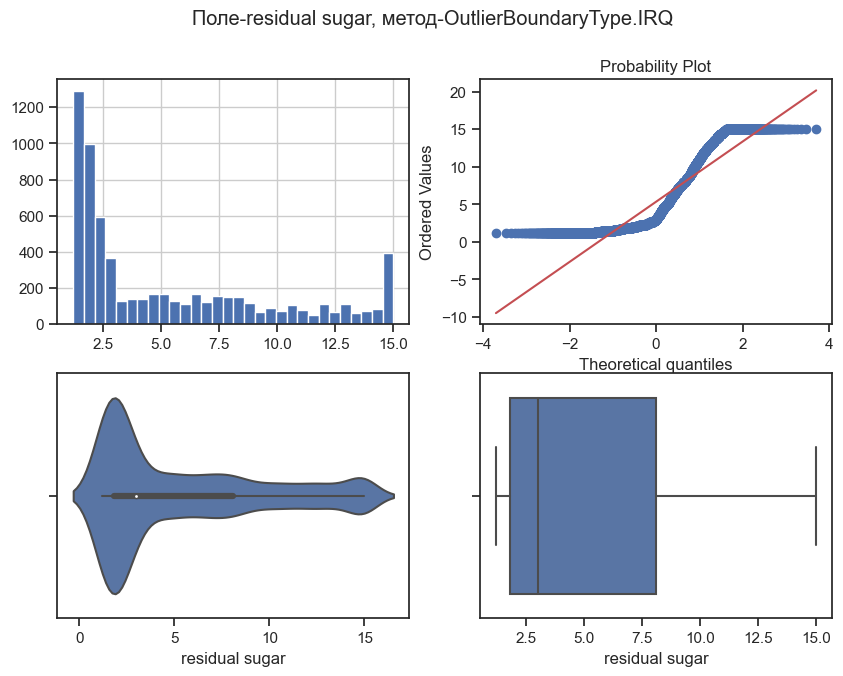

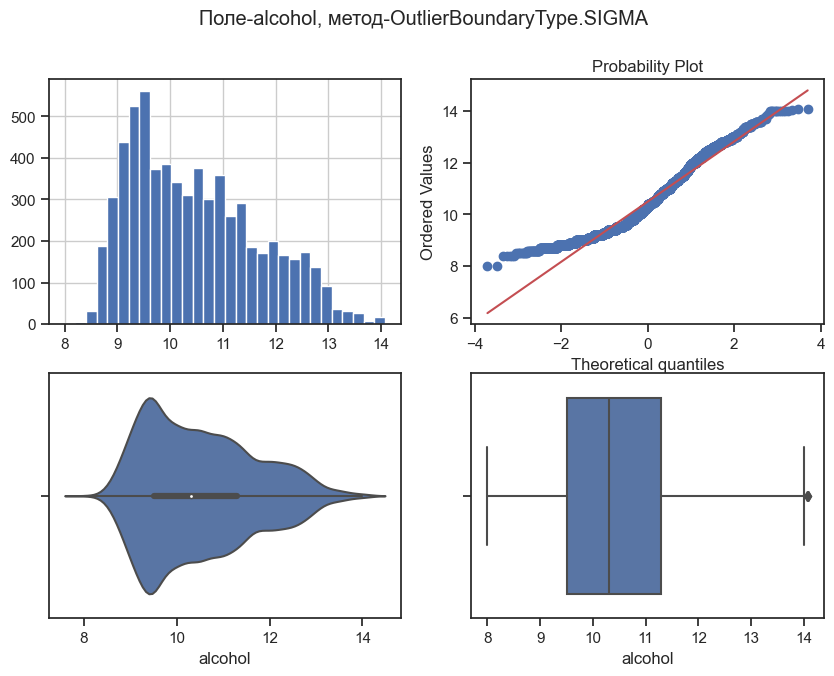

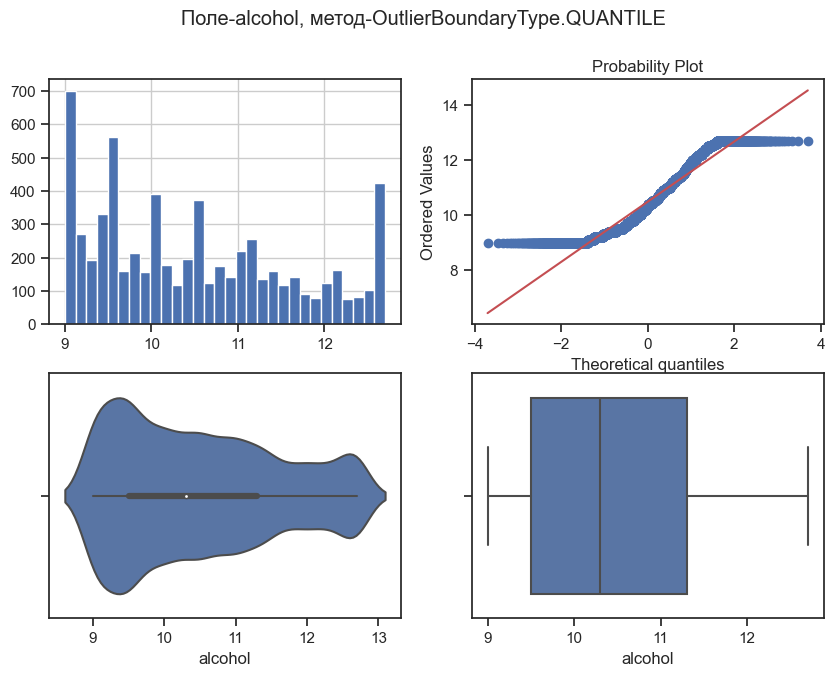

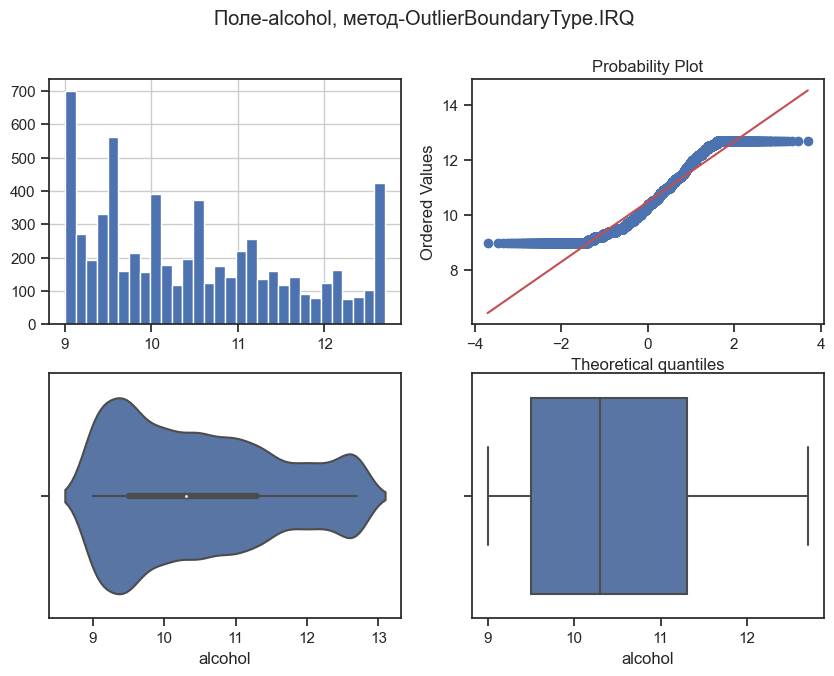

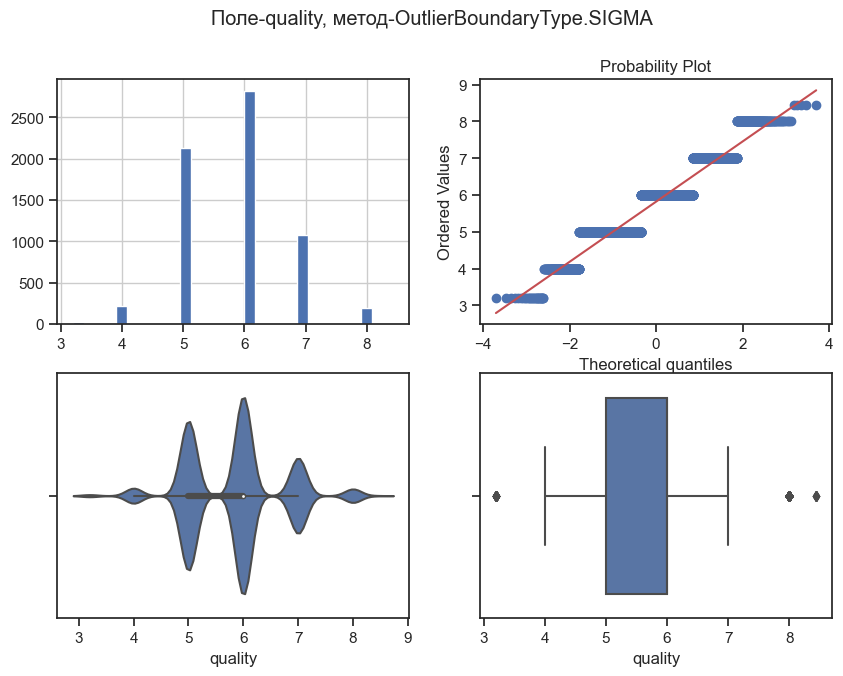

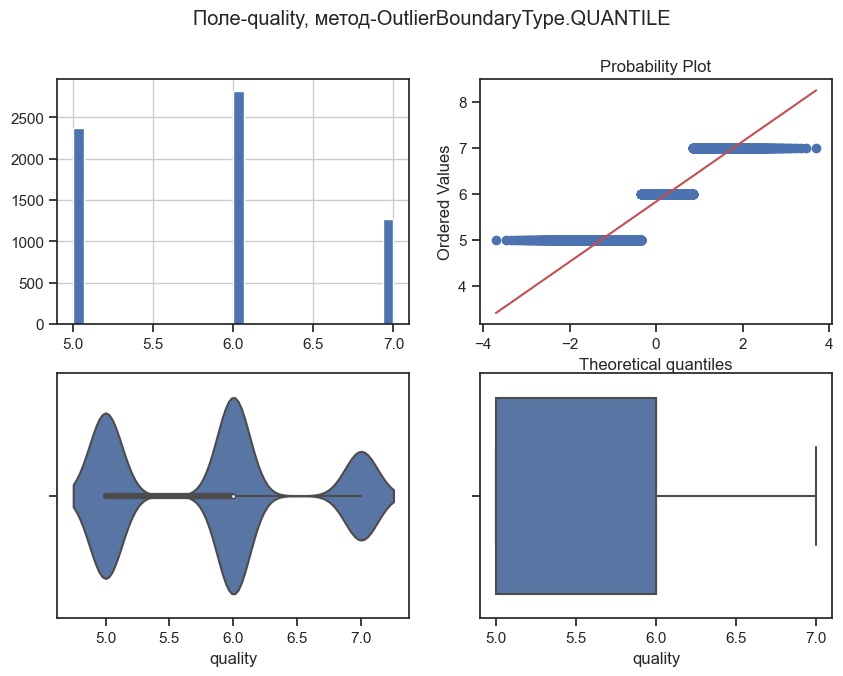

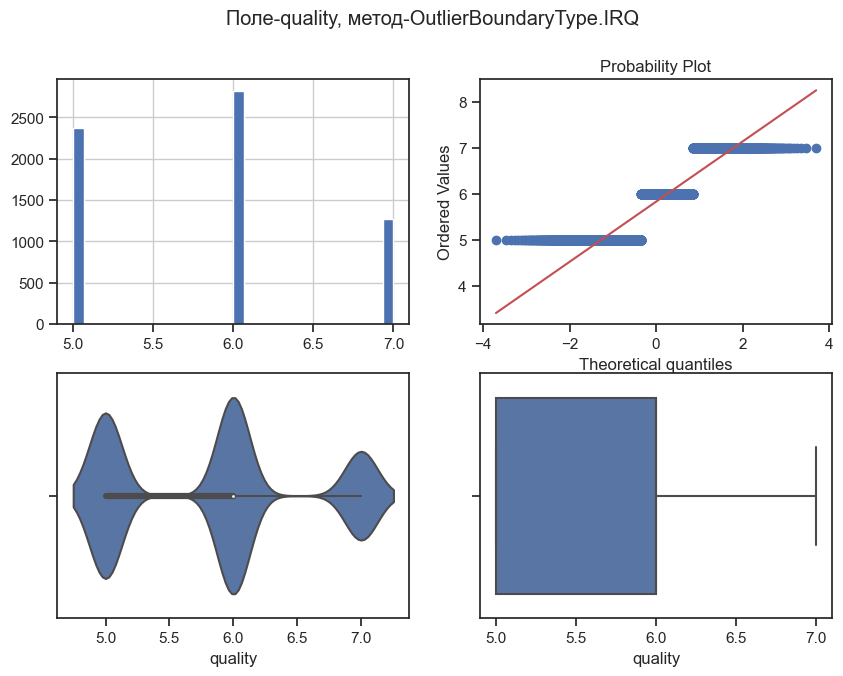

In [48]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data2, col, obt)
        # Изменение данных
        data2[col] = np.where(data2[col] > upper_boundary, upper_boundary, 
                                 np.where(data2[col] < lower_boundary, lower_boundary, data2[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data2, col, title)

Обработка по крайней мере одного нестандартного признака

In [49]:
from datetime import date
import matplotlib.dates as mpl_dates
timedata = pd.read_csv("DailyDelhiClimateTest.csv")
timedata

date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222222    2.894444   1018.277778
2    2017-01-03  17.111111  81.888889    4.016667   1018.333333
3    2017-01-04  18.700000  70.050000    4.545000   1015.700000
4    2017-01-05  18.388889  74.944444    3.300000   1014.333333
..          ...        ...        ...         ...           ...
109  2017-04-20  34.500000  27.500000    5.562500    998.625000
110  2017-04-21  34.250000  39.375000    6.962500    999.875000
111  2017-04-22  32.900000  40.900000    8.890000   1001.600000
112  2017-04-23  32.875000  27.500000    9.962500   1002.125000
113  2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 5 columns]

In [50]:
hdata = timedata
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('date', dtype('O')),
 ('meantemp', dtype('float64')),
 ('humidity', dtype('float64')),
 ('wind_speed', dtype('float64')),
 ('meanpressure', dtype('float64'))]

In [51]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[]

In [52]:
timedata['date'] = pd.to_datetime(timedata['date'])

In [53]:
type(timedata['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
x_col_list_n = ['date']

In [55]:
timedata.reset_index(inplace=True)
timedata['date']=timedata['date'].apply(mpl_dates.date2num)
timedata = timedata.astype(float)

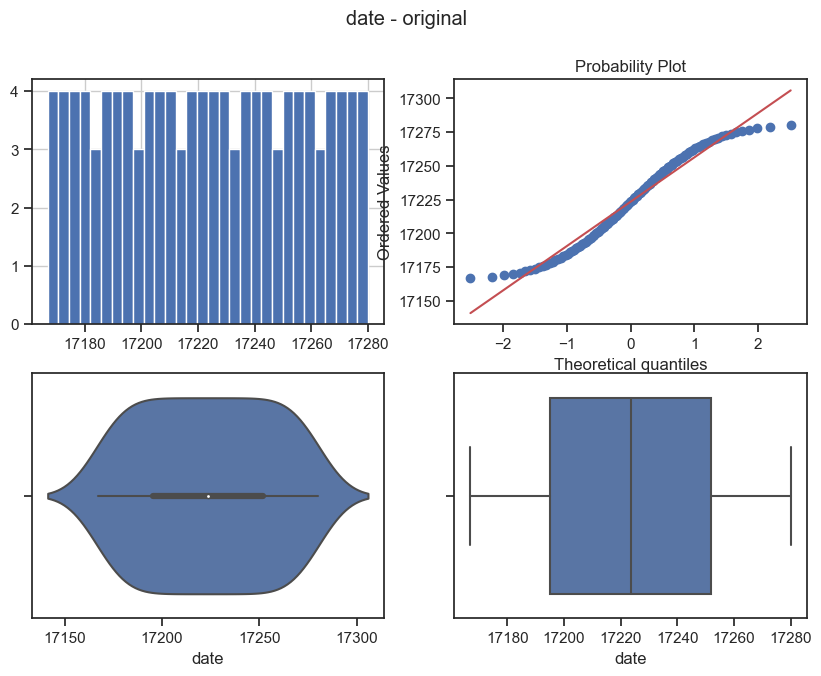

In [56]:
diagnostic_plots(timedata, 'date', 'date - original')

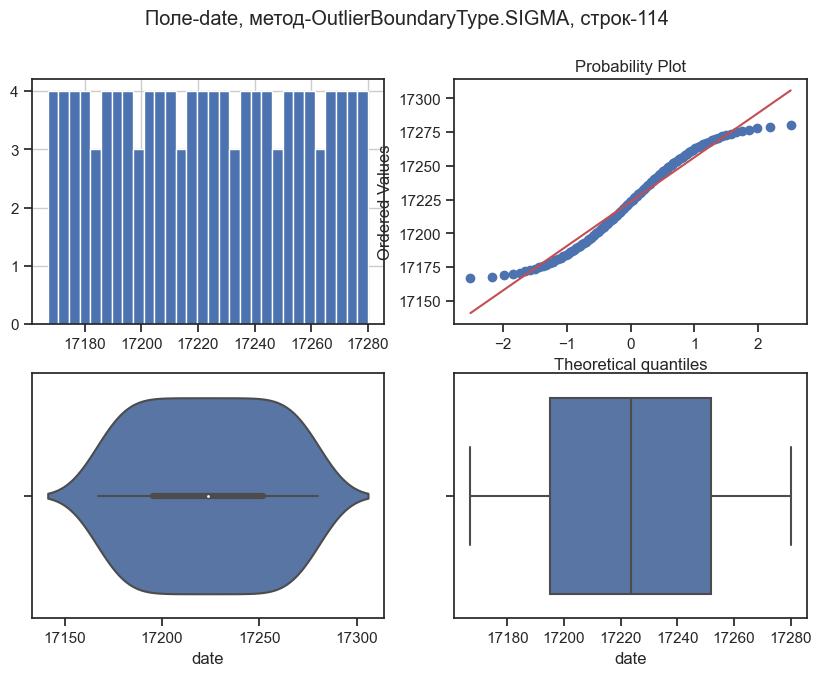

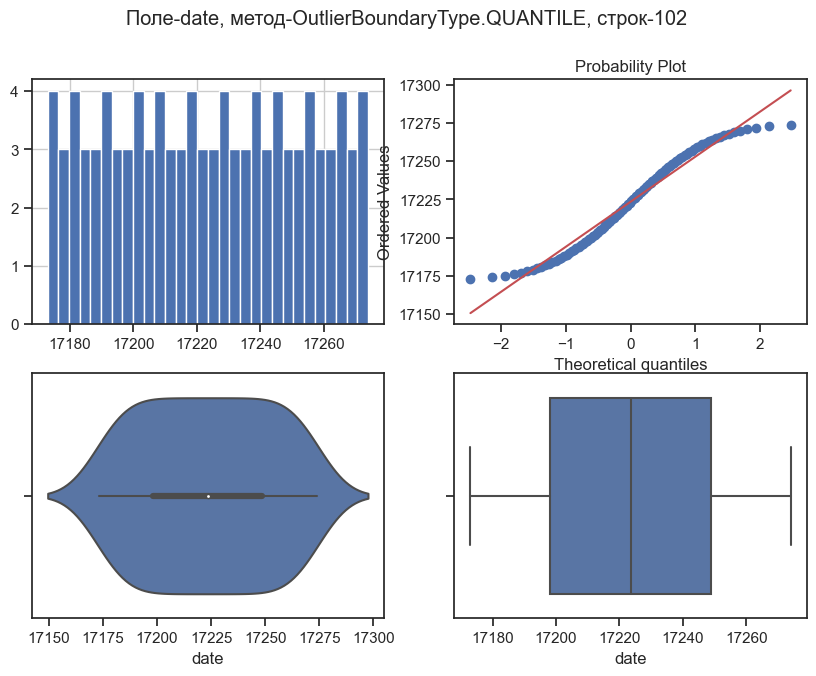

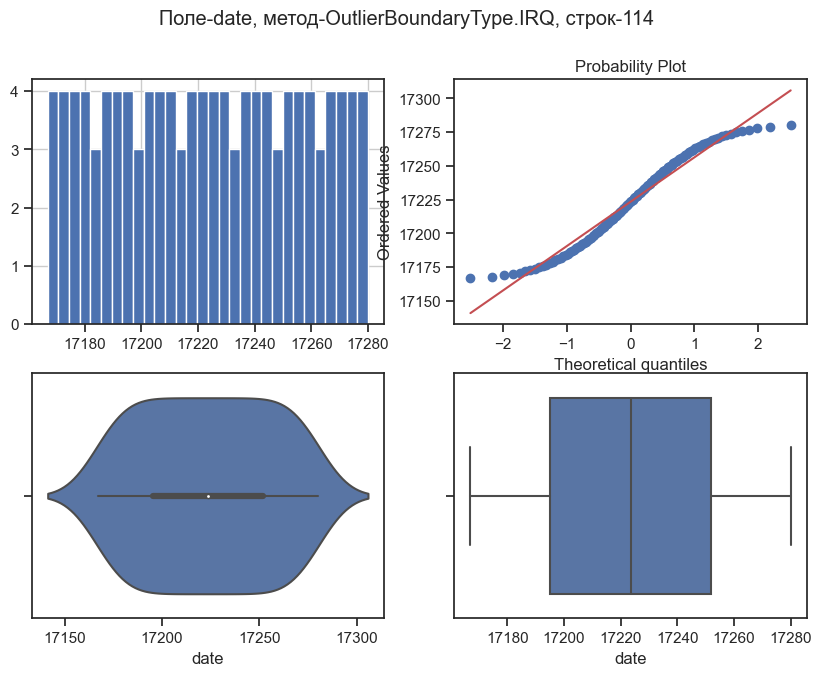

In [57]:
for col in x_col_list_n:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(timedata, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(timedata[col] > upper_boundary, True, 
                                 np.where(timedata[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = timedata.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

Отбор признаков

Методы фильтрации (filter methods)

In [58]:
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([3.49600967e+06, 1.85727591e-01, 1.68431767e+00, 2.71018852e-02,
       2.10949595e-02, 2.26241369e+01, 1.23012312e-03, 3.15326731e+02,
       3.19477751e+03, 9.00726891e-06, 2.58043973e-02, 2.21717714e-02,
       1.42333473e+00, 7.62510717e-01])

In [59]:
# Константный и псевдоконстантный признаки удалены
selector_1211.transform(data)

array([[0, 0, 7.0, ..., 170.0, 8.8, 6],
       [1, 0, 6.3, ..., 132.0, 9.5, 6],
       [2, 0, 8.1, ..., 97.0, 10.1, 6],
       ...,
       [6494, 1, 6.3, ..., 40.0, 11.0, 6],
       [6495, 1, 5.9, ..., 44.0, 10.2, 5],
       [6496, 1, 6.0, ..., 42.0, 11.0, 6]], dtype=object)

In [60]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [61]:
get_duplicates(data)

{'index': [],
 'type': [],
 'fixed acidity': [],
 'volatile acidity': [],
 'citric acid': [],
 'residual sugar': [],
 'chlorides': [],
 'free sulfur dioxide': [],
 'total sulfur dioxide': [],
 'density': [],
 'pH': [],
 'sulphates': [],
 'alcohol': [],
 'quality': []}

<AxesSubplot:>

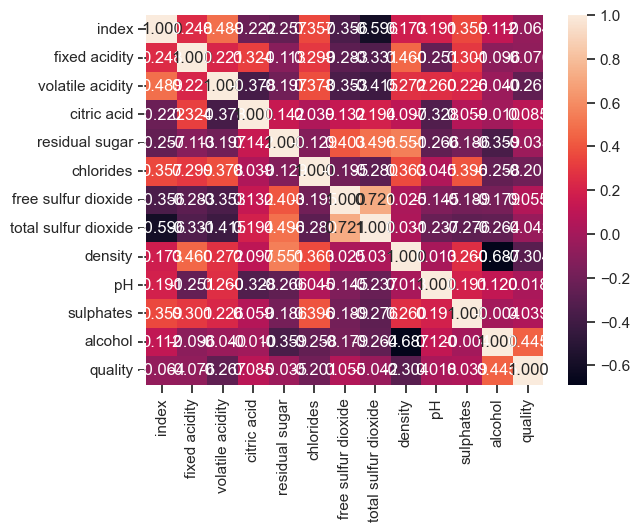

In [62]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [63]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df, x):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= x]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [64]:
make_corr_df(data, 0.8)

Empty DataFrame
Columns: [f1, f2, corr]
Index: []

Корреляций 0.8 и выше нет

In [65]:
make_corr_df(data, 0.5)

f1                    f2      corr
0  total sulfur dioxide   free sulfur dioxide  0.721476
1   free sulfur dioxide  total sulfur dioxide  0.721476
2               alcohol               density  0.687432
3               density               alcohol  0.687432
4  total sulfur dioxide                 index  0.596102
5                 index  total sulfur dioxide  0.596102
6               density        residual sugar  0.551494
7        residual sugar               density  0.551494

In [66]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [67]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data, 0.5))

[['free sulfur dioxide', 'index', 'total sulfur dioxide'],
 ['density', 'alcohol'],
 ['density', 'residual sugar']]

Методы обертывания (wrapper methods)

In [68]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [69]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

x_col_all_not = ['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol','quality']

efs1 = efs1.fit(X_test, y_test, custom_feature_names=x_col_all)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected keyword argument 'custom_feature_names'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarn

UnboundLocalError: local variable 'best_subset' referenced before assignment

In [70]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(X_test, y_test, custom_feature_names=x_col_all)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aleka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: fit() got an unexpected

Features: 91/91

UnboundLocalError: local variable 'best_subset' referenced before assignment

Методы вложений (embedded methods)

In [71]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_test, y_test)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 2.32506550e-03, -8.16523994e+00, -1.22362024e+00,
         4.14141439e+01, -1.84825018e+01,  2.77013478e-01,
         3.30999166e+01,  2.47032003e-01, -1.10879716e-02,
         4.12086540e+01, -4.01440992e+01,  8.41668480e+00,
         3.35241750e-01],
       [-1.94788921e-04, -2.45217410e+00,  2.27830056e-01,
         4.92054233e+00, -9.39619069e-02, -6.23138397e-02,
         3.86990033e+00, -4.17410761e-02, -7.85615650e-04,
        -2.11508808e-02,  3.97256026e-01, -2.53229535e+00,
        -4.35807218e-01],
       [ 4.20451681e-05,  2.45643850e-01,  5.31119468e-02,
         1.98084911e+00, -1.77822918e-01, -9.90438590e-02,
         1.30190982e+00, -2.05898698e-02,  9.55411903e-03,
         3.52360119e+00,  5.72109899e-01, -2.34145833e+00,
        -9.23481211e-01],
       [ 1.61341703e-04,  1.64867713e-02, -6.90542484e-02,
        -2.24771504e+00,  6.18034718e-01,  4.00985358e-02,
        -1.21999827e+00,  9.75380252e-03, -2.75372125e-03,
        -5.61698865e-01,  4.83456991e

In [72]:
# Все 12 признаков являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_test, y_test)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [73]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X_test, y_test)
# Коэффициенты регрессии
e_lr2.coef_

array([[-4.24324348e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.22808095e-03, -2.72431956e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -7.70458986e-02],
       [-4.81356228e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.78172162e-03,
         0.00000000e+00, -5.81917784e-03, -2.64946957e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.47697472e-02],
       [ 6.87551018e-05,  0.00000000e+00,  6.32054212e-02,
         0.00000000e+00,  0.00000000e+00, -2.23033673e-02,
         0.00000000e+00, -9.12884497e-03,  4.74464713e-03,
         0.00000000e+00,  2.33277624e-01,  0.00000000e+00,
        -1.84073776e-01],
       [ 2.28183039e-05,  0.00000000e+00, -3.83749832e-02,
         0.00000000e+00,  0.00000000e+00,  1.41777268e-02,
         0.00000000e+00,  6.36028268e-03, -1.76754887e-03,
         0.00000000e+00,  0.00000000e

In [74]:
# Признаки 1,3,4,6,9,11 исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X_test, y_test)
sel_e_lr2.get_support()

array([ True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False,  True])

In [75]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_test, y_test)
# Коэффициенты регрессии
list(zip(x_col_all, e_ls1.coef_))

[('type', -4.05281522319424e-05),
 ('fixed acidity', -0.0),
 ('volatile acidity', -0.0),
 ('citric acid', -0.0),
 ('residual sugar', 0.0),
 ('chlorides', 0.0),
 ('free sulfur dioxide', -0.0),
 ('total sulfur dioxide', 0.002751714205935953),
 ('density', -0.0017997923625971046),
 ('pH', -0.0),
 ('sulphates', -0.0),
 ('alcohol', 0.0),
 ('quality', 0.0)]

In [76]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_test, y_test)
list(zip(x_col_all, sel_e_ls1.get_support()))

[('type', True),
 ('fixed acidity', False),
 ('volatile acidity', False),
 ('citric acid', False),
 ('residual sugar', False),
 ('chlorides', False),
 ('free sulfur dioxide', False),
 ('total sulfur dioxide', True),
 ('density', True),
 ('pH', False),
 ('sulphates', False),
 ('alcohol', False),
 ('quality', False)]